<a href="https://colab.research.google.com/github/gantir/eva4/blob/develop/s12/B/s12-b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline

In [2]:
try:
  from google.colab import drive
  drive.mount('/content/gdrive/')
except:
  print('May be not using Google Colab')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
from __future__ import print_function
import sys
import os
from argparse import Namespace

import json
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from plotnine import *

In [0]:
os.chdir('/content/gdrive/My Drive/Colab Notebooks/EVA4/data')
with open('eva4-s12-b-coco.json') as f:
  data = json.load(f)

In [5]:
images = {img['id']:img for img in data['images'] }
len(images), images[0]

(50,
 {'date_captured': '',
  'file_name': 'dog.1.jpg',
  'height': 499,
  'id': 0,
  'license': 1,
  'width': 327})

In [6]:
len(data['annotations']), data['annotations'][0]

(53,
 {'area': 118160,
  'bbox': [30, 51, 280, 422],
  'id': 0,
  'image_id': '0',
  'iscrowd': 0,
  'segmentation': [30, 51, 310, 51, 310, 473, 30, 473]})

In [7]:
output = []
for element in data['annotations']:
  img_detail = {}
  id = int(element['image_id'])
  # print(images[id]['height'])
  height = images[id]['height']
  width = images[id]['width']
  img_detail['file_name'] = images[id]['file_name']
  bb_x, bb_y, bb_width, bb_height = element['bbox']
  
  img_detail['height'] = height
  img_detail['width'] = width
  img_detail['height_norm'] = height/height
  img_detail['width_norm'] = width/width
  img_detail['bb_height_norm'] = bb_height/height
  img_detail['bb_width_norm'] = bb_width/width
  img_detail['bb_x_norm'] = bb_x/width
  img_detail['bb_y_norm'] = bb_y/height
  output.append(img_detail)

len(output), output[0]

(53,
 {'bb_height_norm': 0.845691382765531,
  'bb_width_norm': 0.8562691131498471,
  'bb_x_norm': 0.09174311926605505,
  'bb_y_norm': 0.10220440881763528,
  'file_name': 'dog.1.jpg',
  'height': 499,
  'height_norm': 1.0,
  'width': 327,
  'width_norm': 1.0})

In [8]:
df = pd.DataFrame(output)
df.head()

,file_name,height,width,height_norm,width_norm,bb_height_norm,bb_width_norm,bb_x_norm,bb_y_norm
0,dog.1.jpg,499,327,1.0,1.0,0.845691,0.856269,0.091743,0.102204
1,dog.2.jpg,199,187,1.0,1.0,0.688442,0.481283,0.374332,0.231156
2,dog.3.jpg,375,499,1.0,1.0,0.994667,0.947896,0.048096,0.002667
3,dog.4.jpg,287,300,1.0,1.0,0.965157,0.853333,0.136667,0.024390
4,dog.5.jpg,376,499,1.0,1.0,0.848404,0.362725,0.238477,0.013298


In [9]:
df.shape

(53, 9)

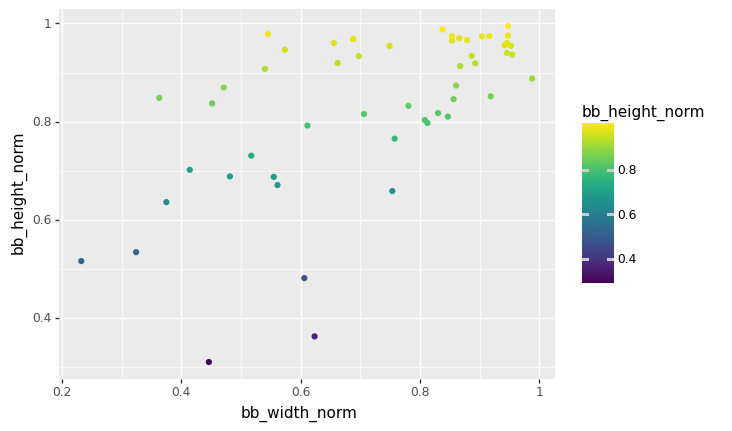

<ggplot: (-9223363271051058649)>

In [10]:
(
    ggplot(data=df)
+geom_point(mapping=aes(x='bb_width_norm', y='bb_height_norm', color='bb_height_norm'))
)

In [11]:
df_k = df[['bb_height_norm','bb_width_norm']]
df_k.head()

,bb_height_norm,bb_width_norm
0,0.845691,0.856269
1,0.688442,0.481283
2,0.994667,0.947896
3,0.965157,0.853333
4,0.848404,0.362725


In [0]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=500, n_init=10, random_state=42)
    kmeans.fit(df_k)
    wcss.append({'k':i, 'inertia':kmeans.inertia_})    

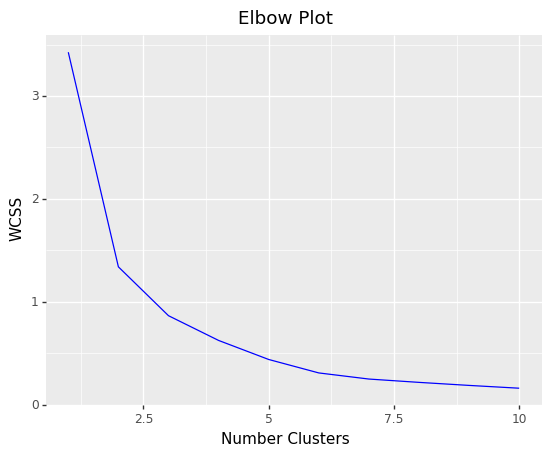

<ggplot: (8765799294605)>

In [18]:
(
  ggplot(data=pd.DataFrame(wcss))
    +geom_line(mapping=aes(x='k', y='inertia'),color="blue")
    +labs(title='Elbow Plot',x = 'Number Clusters', y='WCSS')
)

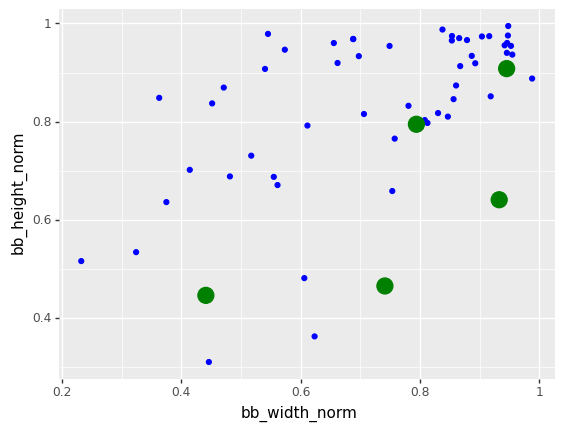

<ggplot: (-9223363271055571326)>

In [73]:
# From the above we choose a cluster of 5

kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=500, n_init=10, random_state=42)
pred_y = kmeans.fit_predict(df_k)

(
    ggplot()
    +geom_point(data=df_k,mapping=aes(x='bb_width_norm', y='bb_height_norm'), color="blue")
    +geom_point(data=pd.DataFrame(kmeans.cluster_centers_),mapping=aes(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1]), color="green", size=6)
)